## Project by Maria Shemyakina

### Exploratory data analysis(SQL)
You have files that contain the data retrieved with queries from the previous tasks.
/datasets/project_sql_result_01.csv — the result of the first query. 
It contains the following data:
    company_name: taxi company name
    trips_amount: the number of rides for each taxi company on November 15-16, 2017.
/datasets/project_sql_result_04.csv — the result of the second query. 
It contains the following data:
    dropoff_location_name: Chicago neighborhoods where rides ended
    average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to
* import the files
* study the data they contain
* make sure the data types are correct
* identify the top 10 neighborhoods in terms of drop-offs
* make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
* draw conclusions based on each graph and explain the results

### Testing hypotheses (Python)
/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. 

Remember, these are the table's field values:
* start_ts
* pickup date and time
* weather_conditions
* weather conditions at the moment the ride started
* duration_seconds
* ride duration in seconds

Test the hypothesis:
 * "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
* Decide where to set the significance level (alpha) on your own.

Explain:

* how you formed the null and alternative hypotheses
* what criterion you used to test the hypotheses and why

### Preparing our data

Import the  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns



Read and open the datasets.

data_rides=cab_name
data_neigh=loc_name

In [2]:
cab_name = pd.read_csv('project_sql_result_01.csv')
loc_name = pd.read_csv('project_sql_result_04.csv')

In [3]:
cab_name.sample(10)

,company_name,trips_amount
11,Globe Taxi,4383
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
6,City Service,8448
56,5997 - 65283 AW Services Inc.,12
5,Chicago Carriage Cab Corp,9181
1,Taxi Affiliation Services,11422
42,1085 - 72312 N and W Cab Co,29
46,3620 - 52292 David K. Cab Corp.,21
57,Metro Group,11
35,6742 - 83735 Tasha ride inc,39


In [4]:
cab_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
loc_name.sample(10)

,dropoff_location_name,average_trips
87,Pullman,3.896552
31,Lower West Side,143.300000
41,North Park,67.833333
36,Kenwood,89.366667
84,West Pullman,6.466667
1,River North,9523.666667
20,Rush & Division,395.533333
9,Sheffield & DePaul,1259.766667
73,Chicago Lawn,12.266667
90,Hegewisch,3.117647


In [6]:
loc_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


We don't have any missing values. Check for duplicates

In [7]:
cab_name.duplicated().sum()

0

In [8]:
loc_name.duplicated().sum()

0

I decided convert data types and  round up the average trips.

In [9]:
loc_name['average_trips'] = loc_name['average_trips'].apply(np.ceil).astype('int')

In [10]:
loc_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


### Data Analysis

- Identify the top 10 neighborhoods in terms of drop-offs.

In [11]:
top10 = loc_name.sort_values(by='average_trips', ascending=False).head(10)

In [12]:
top10

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

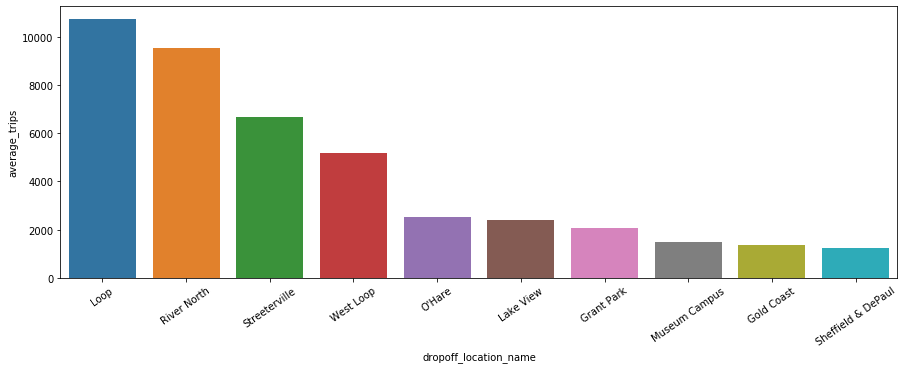

In [13]:
ax = plt.subplots(figsize=(15,5))
chart = sns.barplot(x = "dropoff_location_name",
           y = "average_trips",
           estimator = sum,
           data = top10,
                )

plt.xticks(rotation = 35)



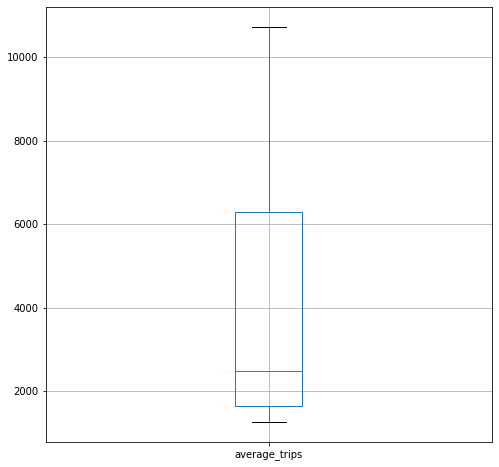

In [14]:
top10.boxplot(figsize=(8,8))

In [15]:
top10.describe()

,average_trips
count,10.000000
mean,4325.300000
std,3530.244186
min,1260.000000
25%,1649.750000
50%,2484.000000
75%,6289.750000
max,10728.000000


* top10 neighborhoods by number of dropoffs

In [16]:
top10_cab = cab_name.sort_values('trips_amount', ascending=False).head(10)

In [17]:
top10_cab

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

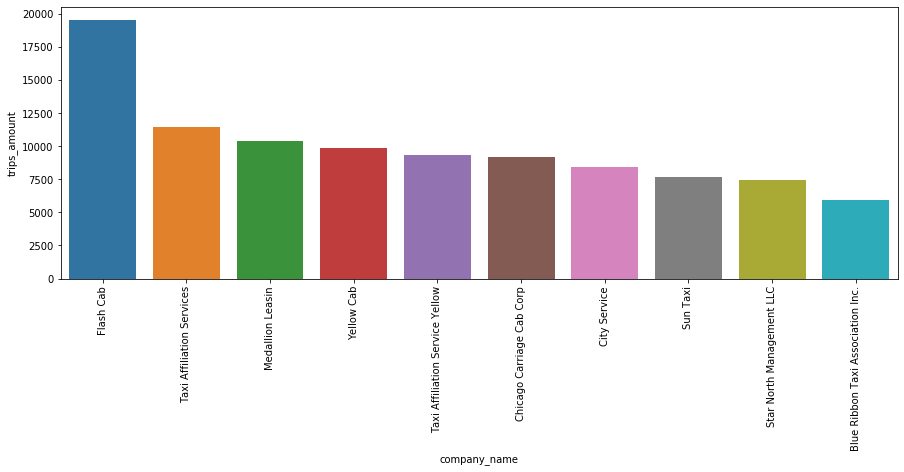

In [18]:
ax = plt.subplots(figsize=(15,5))
chart = sns.barplot(x = "company_name",
           y = "trips_amount",
           estimator = sum,
           data = top10_cab,
                )

plt.xticks(rotation = 90)



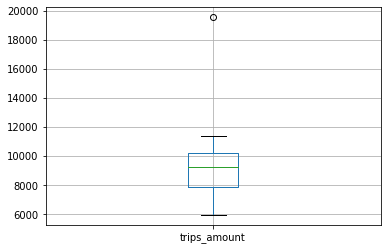

In [19]:
top10_cab.boxplot()

In [20]:
top10_cab.describe()

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000


### Conclusion:

As we can see, Flash cab was the most popular cab company in that days. The most popular places in November 2017, that have average number of trips above the mean are:
   - *Loop*
   - *River North*
   - *Streetervile*

###  Testing Hypothesis

Read and check the dataset.

In [21]:
data_duration = pd.read_csv('project_sql_result_07.csv')

In [22]:
data_duration.sample(10)

,start_ts,weather_conditions,duration_seconds
984,2017-11-04 15:00:00,Good,2400.0
70,2017-11-18 16:00:00,Bad,3000.0
569,2017-11-18 15:00:00,Good,2889.0
91,2017-11-04 14:00:00,Good,3300.0
976,2017-11-25 10:00:00,Good,1584.0
816,2017-11-11 14:00:00,Good,2580.0
881,2017-11-25 11:00:00,Good,1800.0
173,2017-11-04 08:00:00,Good,1380.0
386,2017-11-04 16:00:00,Bad,3000.0
309,2017-11-04 12:00:00,Good,2460.0


In [23]:
data_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


We don't have missing values, so let's check duplicates and describe our data

In [24]:
data_duration.duplicated().sum()

197

In [25]:
data_duration = data_duration.drop_duplicates()

In [26]:
data_duration.duplicated().sum()

0

In [27]:
data_duration.describe()

,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


In [28]:
data_duration['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

I decided to convert the start_ts into a datetime and weather_conditions to a category because it only has two values Good and Bad. 

In [29]:
data_duration['start_ts'] = pd.to_datetime(data_duration['start_ts'], format='%Y%m%dT%H:%M:%S')

In [30]:
data_duration.weather_conditions = data_duration.weather_conditions.astype('category')

- The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

* Null hypotheis: The average duration of rides from the Loop to O'Hare International Airport are equal on rainy Saturdays.

* Alternative hypothesis: TThe average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

Criterion:
* I decided to use 5% as the significance level because it is the range within which if the pvalue falls within, then the probablity of the average durations being equal will be too low, hence the null hypothesis will be rejected. The measured value will be too far from the expected value.

In [31]:
rainy_saturday = data_duration.query('weather_conditions == "Bad"')
rainy_saturday = rainy_saturday[['duration_seconds']]

In [32]:
non_rainy_saturday = data_duration.query('weather_conditions == "Good"')
non_rainy_saturday = non_rainy_saturday[['duration_seconds']]

In [33]:
alpha = 0.05

In [34]:
duration_results = st.ttest_ind(rainy_saturday, non_rainy_saturday, equal_var=True)

In [35]:
duration_results.pvalue

array([7.39777069e-08])

In [36]:
if duration_results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Conclusion:

**By rejecting the null hypothesis, the p-value tells us that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**